## 使用自己封装的随机梯度下降

In [56]:
import numpy as np
import matplotlib.pyplot as plt

(10000, 1) (10000,)


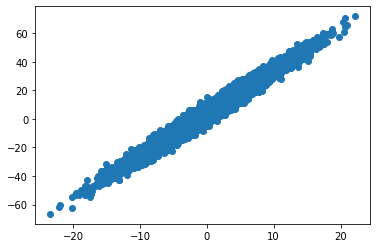

In [57]:
m = 10000
x = np.random.normal(0,6,size=m)
X = x.reshape(-1,1)
y = x*3. + 4. + np.random.normal(0,3,size=m)
print(X.shape,y.shape)
plt.scatter(X,y)
plt.show()

In [58]:
from code.linerRegression import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit_gsd(X,y,n_iters=10)
print(lin_reg.intercept_)

3.975346173629693


## 使用真实数据

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)
standard = StandardScaler()
standard.fit(X_train)
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

In [60]:
from code.linerRegression import LinearRegression
lin_reg = LinearRegression()
%time lin_reg.fit_gsd(X_train_standard,y_train,n_iters = 100)
print(lin_reg.score(X_test_standard,y_test))

Wall time: 188 ms
0.6471100319283605


In [61]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter_no_change = 100)
sgd_reg.fit(X_train_standard,y_train)
print(sgd_reg.score(X_test_standard,y_test))

0.6506646548658727
